# Are You Normal? Hint: No.

This is one of the Jupyter notebooks I used in my preparation of *[Probably Overthinking It: How to Use Data to Answer Questions, Avoid Statistical Traps, and Make Better Decisions](https://greenteapress.com/wp/probably-overthinking-it)*, University of Chicago Press, 2023.

Before you read these notebooks, please keep in mind:

* There is some explanatory text in the notebooks, but some of the examples will not make sense until you have read the corresponding chapter in the book.

* While preparing these notebooks, I made some changes to improve the readability of the code. There might be small differences between what appears in the book and what you get when you run the code.

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ProbablyOverthinkingIt/blob/book/notebooks/gaussian.ipynb).

In [1]:
# Install empirical dist if we don't already have it

# On Colab, we might need to update matplotlib to get plt.stairs (added in 3.6.2)
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist
    !pip install -U matplotlib

In [2]:
# download utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/notebooks/utils.py")

What does it mean to be normal? And what does it mean to be weird?
I think there are two factors that underlie our intuition for these ideas:

* "Normal" and "weird" are related to the idea of average. If by some measurement you are close to the average, you are normal; if you are far from the average, you are weird.

* "Normal" and "weird" are also related to the idea of rarity. If some ability or characteristic of yours is common, it is normal; if it's rare, it's weird.

Intuitively, most people think that these things go together; that is, we expect measurements close to the average be common, and measurements far from average to be rare.

For many things this intuition is valid. 
For example, the average height of adults in the United States is about 170 cm.
Most people are close to this average: about 64\% of adults are within 10 cm plus or minus; 93\% are within 20 cm.
And few people are far from average: only 1\% of the population is shorter than 145 cm or taller than 195 cm.

The numbers in the previous paragraph come from the [Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/index.html) (BRFSS).
Here is the [notebook I used to download and clean the data](https://colab.research.google.com/github/AllenDowney/ProbablyOverthinkingIt/blob/book/notebooks/clean_brfss.ipynb).

I generated a sample from the dataset, which we can download like this:

In [3]:
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/brfss_sample.hdf")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

brfss = pd.read_hdf("brfss_sample.hdf", "brfss")
height = brfss["HTM4"]
height.describe()

count    375271.000000
mean        170.162448
std          10.921335
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         234.000000
Name: HTM4, dtype: float64

In [5]:
from empiricaldist import Cdf

cdf_height = Cdf.from_seq(height)
cdf_height([150, 190])

array([0.02090223, 0.9663763 ])

In [6]:
cdf_height.inverse([0.01, 0.99])

array([150., 193.])

In [7]:
from scipy.stats import norm

mu, sigma = height.mean(), height.std()
dist = norm(mu, sigma)

np.diff(dist.cdf([160, 180]))

array([0.64009059])

In [8]:
np.diff(dist.cdf([150, 190]))

array([0.93291072])

In [9]:
dist.ppf([0.01, 0.99])

array([144.75562401, 195.56927187])

But what is true when we consider a single characteristic turns out to be partly false when we consider a few characteristics at once, and spectacularly false when we consider more than a few.
In fact, when we consider the many ways people are different, we find that 

* People near the average are rare or non-existent,

* Everyone is far from average, and

* Everyone is roughly the same distance from average.

At least in a mathematical sense, no one is normal, everyone is weird, and everyone is the same amount of weird.

## Present... Arms

Here's the ANSUR data, originally downloaded from [The OPEN Design Lab](https://www.openlab.psu.edu/ansur2/).

In [10]:
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/ANSURIIFEMALEPublic.csv")
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/ANSURIIMALEPublic.csv")

In [11]:
ansur_female = pd.read_csv("ANSURIIFEMALEPublic.csv", encoding="ISO-8859-1")
ansur_female.shape

(1986, 108)

In [12]:
ansur_male = pd.read_csv("ANSURIIMALEPublic.csv", encoding="ISO-8859-1")
ansur_male.shape

(4082, 108)

In [13]:
ansur_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


[*The Measurer’s Handbook*](http://tools.openlab.psu.edu/publicData/ANSURII-TR11-017.pdf) used in the ANSUR survey is 253 pages,
and includes details on "sampling strategy and measuring techniques"
as well as descriptions and diagrams of the landmarks and measurements between them.



Since heights are in mm, I converted to cm.

In [14]:
height_male = ansur_male["stature"] / 10
height_female = ansur_female["stature"] / 10

The following function plots histograms using `plt.stairs`.

In [15]:
from utils import underride


def histplot(series, fill=True, **options):
    """Plot a histogram.
    
    series: Pandas Series
    fill: boolean, whether to fill below the curve
    options: passed to plt.stairs
    """
    underride(
        options,
        color="C0",
        alpha=0.7,
        lw=1.5,
    )
    bins = options.pop("bins", 40)
    counts, bins = np.histogram(series, bins=bins)
    counts = counts / counts.sum() * 100
    plt.stairs(counts, bins, **options)

    if fill:
        options.update(dict(label="", alpha=0.1))
        plt.stairs(counts, bins, fill=True, **options)

Here are the histograms of male and female heights.

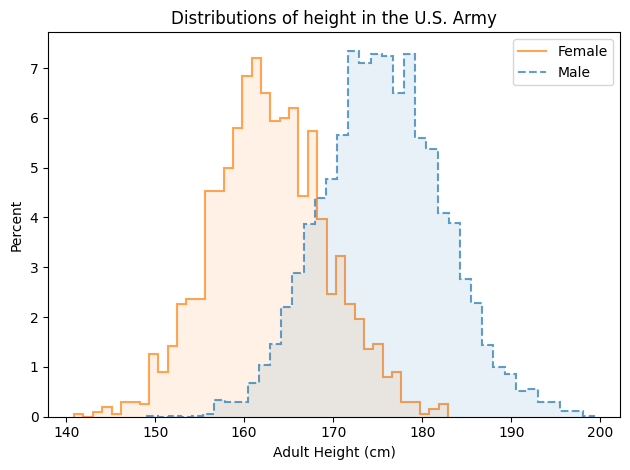

In [16]:
from utils import decorate

histplot(height_female, color="C1", label="Female")
histplot(height_male, color="C0", ls="--", label="Male")

decorate(
    xlabel="Adult Height (cm)",
    ylabel="Percent",
    title="Distributions of height in the U.S. Army",
)

The following cell shows a way to calculate a Gaussian curve -- for clarity I used base 10 (instead of $e$) and no parameters.

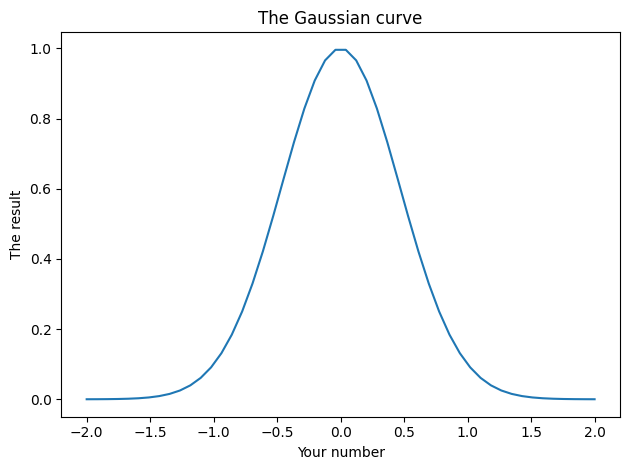

In [17]:
xs = np.linspace(-2, 2)
ys = 1 / 10 ** (xs * xs)

plt.plot(xs, ys)
decorate(xlabel="Your number", ylabel="The result", title="The Gaussian curve")

The following function plots a Gaussian curve with the same mean and std as the data.

The scale parameter is arbitrary -- I chose it to be roughly the same height as the histogram, which is also arbitrary. Avoiding this arbitrariness is one reason I prefer to use CDF to compare the distribution of data with a model.

In [18]:
from scipy.stats import norm


def plot_normal_pdf(series, scale, **options):
    """Plot the PDF of a Gaussian distribution.
    
    series: Pandas series
    scale: multiplier used to scale the PDF
    options: passed to plt.plot
    """
    mu, sigma = series.mean(), series.std()
    qs = np.linspace(series.min(), series.max())
    ps = norm.pdf(qs, mu, sigma)
    ps *= scale / np.max(ps)
    plt.plot(qs, ps, alpha=0.8, **options)

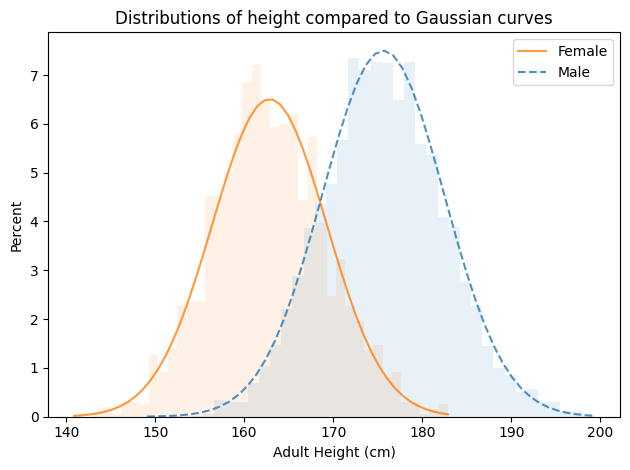

In [19]:
histplot(height_female, color="C1", lw=0, alpha=0.3)
histplot(height_male, color="C0", lw=0, alpha=0.2)
plot_normal_pdf(height_female, 6.5, color="C1", label="Female")
plot_normal_pdf(height_male, 7.5, color="C0", ls="--", label="Male")

decorate(
    xlabel="Adult Height (cm)",
    ylabel="Percent",
    title="Distributions of height compared to Gaussian curves",
)

## Why?

The following function generates simulated values that are the sum of a number of random factors, shifted and scaled so they have the same mean and std as the given data.

In [20]:
def run_simulation(series):
    """Simulate the sum of randomly-selected effects.
    
    series: Pandas Series
    
    returns: Series of simulated values
    """
    # generate the effect of each coin toss
    num_effects = 20
    effects = np.random.uniform(-3, 3, size=(2, num_effects))

    # toss coins and add up the effects
    flips = np.random.choice([True, False], size=(len(series), num_effects))
    totals = np.where(flips, effects[0], effects[1]).sum(axis=1)

    # shift and scale the results to match the mean and std of the given series
    sim = (totals - totals.mean()) / totals.std()
    sim *= series.std()
    sim += series.mean()
    return sim

In [21]:
np.random.seed(10)
sim_female = run_simulation(height_female)
sim_male = run_simulation(height_male)

The result shows that values generated this way can resemble the actual data.

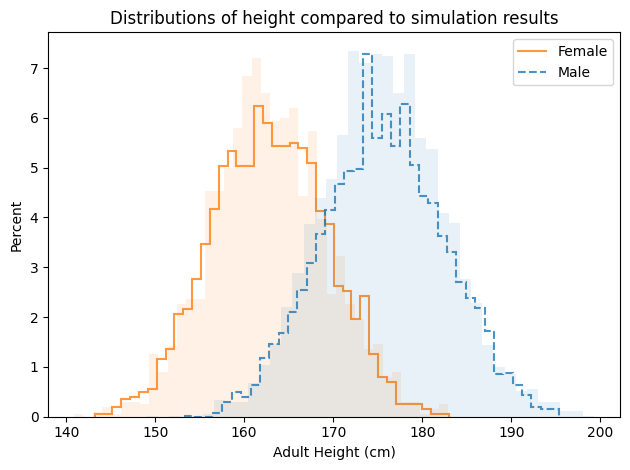

In [22]:
histplot(height_female, color="C1", alpha=0.3, lw=0)
histplot(sim_female, fill=False, color="C1", alpha=0.8, label="Female")

histplot(height_male, color="C0", alpha=0.2, lw=0)
histplot(sim_male, fill=False, color="C0", alpha=0.8, ls="--", label="Male")

decorate(
    xlabel="Adult Height (cm)",
    ylabel="Percent",
    title="Distributions of height compared to simulation results",
)

## Comparing Distributions

Here are the examples in the book.

In [23]:
(height_female <= 160).mean() * 100

33.987915407854985

In [24]:
(height_male <= 180).mean() * 100

74.57128858402744

And here's a figure that shows the CDFs and the highlighted examples.

In [25]:
from empiricaldist import Pmf, Cdf
from utils import make_cdf

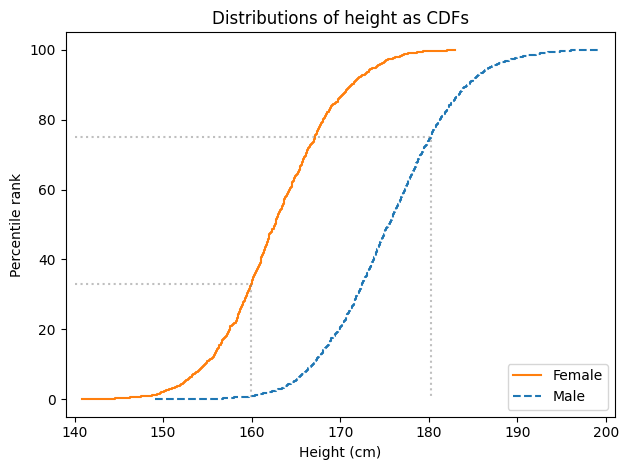

In [26]:
def plot_lookup(series, percentile_rank, **options):
    """Plot a line representing a lookup in a CDF.
    
    series: Pandas Series
    percentile_rank: which percentile to look up
    options: passed to plt.plot
    """
    options = underride(options, ls=":", color="gray", alpha=0.5)
    ymin = 0
    ymax = percentile_rank
    xmin = 140
    xmax = np.percentile(series.dropna(), percentile_rank)
    plt.plot([xmin, xmax, xmax], [ymax, ymax, 0], **options)

make_cdf(height_female).step(color="C1", label="Female")
plot_lookup(height_female, 33)

make_cdf(height_male).step(ls="--", label="Male")
plot_lookup(height_male, 75)

decorate(
    xlabel="Height (cm)",
    ylabel="Percentile rank",
    xlim=[139, 201],
    title="Distributions of height as CDFs",
    loc="lower right",
)

The following figure compares the CDFs of the data to the CDFs of the simulated data.

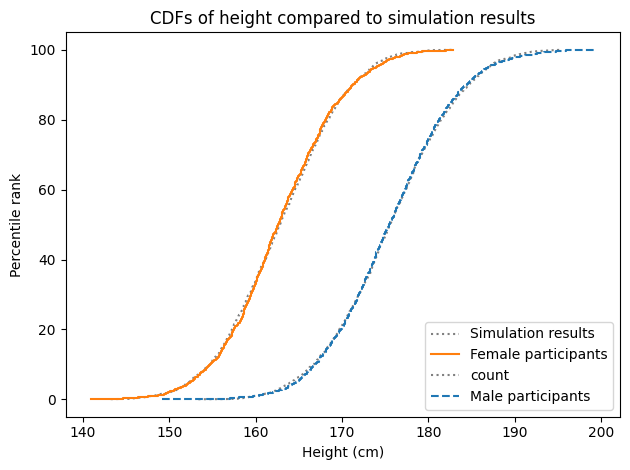

In [27]:
make_cdf(sim_female).plot(ls=":", color="gray", label="Simulation results")
make_cdf(height_female).step(color="C1", label="Female participants")

make_cdf(sim_male).plot(ls=":", color="gray")
make_cdf(height_male).step(ls="--", label="Male participants")

decorate(
    xlabel="Height (cm)",
    ylabel="Percentile rank",
    title="CDFs of height compared to simulation results",
    loc="lower right",
)

The following figure shows the CDFs of the data compared to the CDF of a Gaussian model chosen to fit the data.

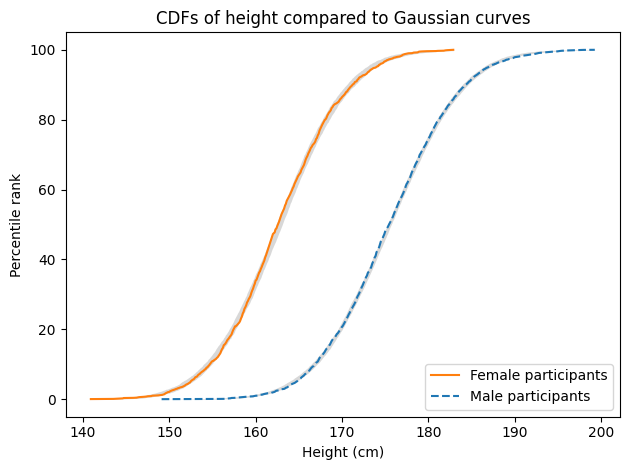

In [28]:
from utils import gaussian_plot

gaussian_plot(height_female, color="C1", label="Female participants")
gaussian_plot(height_male, style="--", label="Male participants")

decorate(
    xlabel="Height (cm)",
    ylabel="Percentile rank",
    title="CDFs of height compared to Gaussian curves",
    loc="lower right",
)

## How Gaussian Is It?

Here are the names of the measurements.

In [29]:
measurements = [column for column in ansur_female.columns if column.lower() == column]
measurements

['abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbreadth',
 'headcir

In [30]:
len(measurements)

93

To find the measurements that fit a Gaussian model the best and the worst, I use the following function, which computes the maximum vertical distance between the CDF of the data and the model.

In [31]:
from utils import fit_gaussian


def ks_distance(series):
    """Compute the Kolmogorov-Smirnov distance. 
    
    returns: the maximum vertical distance between data and model,
    and the quantile where it happens
    """
    mu, sigma = fit_gaussian(series)
    cdf = Cdf.from_seq(series)
    norm_cdf = norm.cdf(cdf.qs, mu, sigma)
    diff = np.abs(cdf - norm_cdf)
    idx_diff = diff.idxmax()
    return diff.max(), idx_diff

The following function computes this distance for all of the measurements.

In [32]:
def all_ks_distances(df, tag, measurements):
    """Compute K-S distances for all measurements.
    
    df: DataFrame
    tag: string added to the list of results
    measurements: list of column names in df
    
    returns: list of (distance, location, tag, varname) tuples
    """
    res = []

    for varname in measurements:
        series = df[varname]
        diff, idx_diff = ks_distance(series)
        res.append((diff, idx_diff, tag, varname))

    return res

Now we can make a list of results for all measurements, male and female.

In [33]:
res_female = all_ks_distances(ansur_female, "female", measurements)

In [34]:
res_male = all_ks_distances(ansur_male, "male", measurements)

In [35]:
res = res_female + res_male
res.sort()

In [36]:
ks = np.array([k for k, _, _, _ in res])

In [37]:
np.percentile(ks, [25, 50, 75])

array([0.01326444, 0.01713559, 0.02188356])

Here are the measurements where the distance between the data and the model is smallest.

In [38]:
res[:6]

[(0.007976688413202315, 417, 'male', 'poplitealheight'),
 (0.008287821935083484, 1236, 'male', 'tenthribheight'),
 (0.00843626564225694, 259, 'male', 'footlength'),
 (0.00847470594399502, 588, 'male', 'forearmforearmbreadth'),
 (0.009157729549038263, 1405, 'male', 'chestheight'),
 (0.009204705604616392, 378, 'female', 'biacromialbreadth')]

And here are the measurements where it's the biggest.

In [39]:
res[-5:]

[(0.034873574671792015, 59, 'female', 'heelbreadth'),
 (0.03687917653057654, 59, 'female', 'earlength'),
 (0.0371247103521638, 251, 'female', 'waistdepth'),
 (0.041545838706235516, 246, 'female', 'radialestylionlength'),
 (0.05654289123999018, 614, 'female', 'interpupillarybreadth')]

Most of the best-fitting measurements are male, most of the worst-fitting are female. That's because the sample size is smaller for the female participants, which means there is more deviation from the model due to chance.

Here's the measurement that fits the Gaussian model the best.

In [40]:
series = ansur_male["poplitealheight"] / 10
diff, idx_diff = ks_distance(series)
diff * 100, idx_diff

(0.7976621308029785, 41.7)

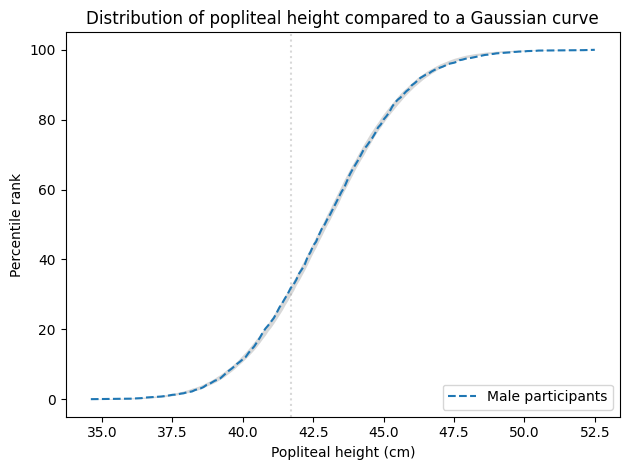

In [41]:
plt.axvline(idx_diff, color="gray", ls=":", alpha=0.3)
gaussian_plot(series, label="Male participants", style="--")
decorate(
    xlabel="Popliteal height (cm)",
    ylabel="Percentile rank",
    title="Distribution of popliteal height compared to a Gaussian curve",
    loc="lower right",
)

The measurement with the highest distance is `interpupillarybreadth`. But based on the figure below, that appears to be an artifact due to a single measurement. In retrospect, I could have computed distances in a way that would not be thrown off by this anomaly.

In [42]:
# "distance between the radiale landmark on the right elbow and
# the stylion landmark on the right wrist"
# basically, forearm length

series = ansur_female["interpupillarybreadth"] / 10
diff, idx_diff = ks_distance(series)
diff * 100, idx_diff

(5.6542891239820205, 61.4)

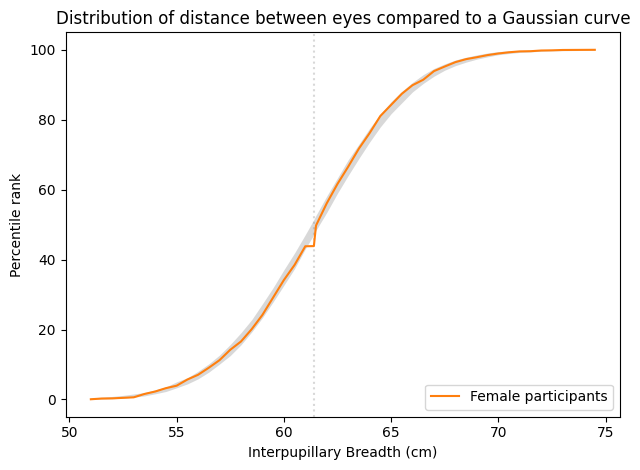

In [43]:
plt.axvline(idx_diff, ls=":", color="gray", alpha=0.3)
gaussian_plot(
    ansur_female["interpupillarybreadth"] / 10, label="Female participants", color="C1"
)
decorate(
    xlabel="Interpupillary Breadth (cm)",
    ylabel="Percentile rank",
    title="Distribution of distance between eyes compared to a Gaussian curve",
    loc="lower right",
)

What I reported in the book is `radialestylionlength`, which is second and the list and seems to be legitimately the measurement that is the worst fit for the model.

In [44]:
# "distance between the radiale landmark on the right elbow and
# the stylion landmark on the right wrist"
# basically, forearm length

series = ansur_female["radialestylionlength"] / 10
diff, idx_diff = ks_distance(series)
diff * 100, idx_diff

(4.154583865194262, 24.6)

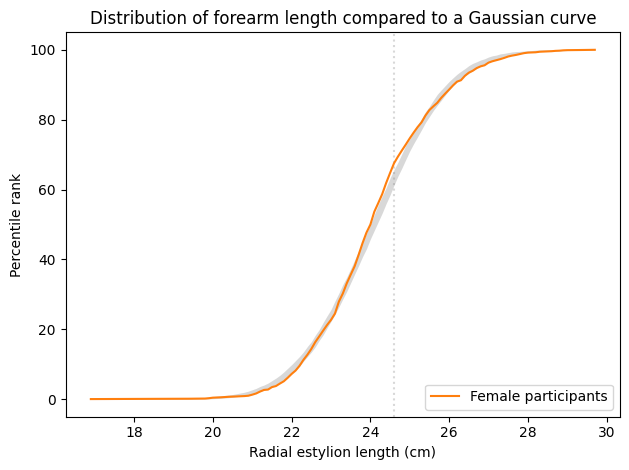

In [45]:
plt.axvline(idx_diff, ls=":", color="gray", alpha=0.3)
gaussian_plot(
    ansur_female["radialestylionlength"] / 10, label="Female participants", color="C1"
)
decorate(
    xlabel="Radial estylion length (cm)",
    ylabel="Percentile rank",
    title="Distribution of forearm length compared to a Gaussian curve",
    loc="lower right",
)

## The Myth of the "Average Man"

Here are the measurements from ANSUR that are the closest to the measurements in Daniels's report.

In [46]:
daniels_measurements = [
    "stature",
    "chestcircumference",
    "sleevelengthspinewrist",
    "crotchheight",
    "verticaltrunkcircumferenceusa",
    "hipbreadthsitting",
    "neckcircumference",
    "waistcircumference",
    "thighcircumference",
    "crotchlengthposterioromphalion",
]

In [47]:
np.any(ansur_male.describe().loc["count"] != 4082)

False

The following table shows the names of these measurements, the mean and standard deviations of the values, the low and high ends of the range considered "approximately average", and the percentage of survey participants who fall in the range.

In [48]:
res = []

for varname in daniels_measurements:
    series = ansur_male[varname] / 10
    mu, sigma = series.mean(), series.std()
    num_std = 0.3
    low, high = np.array([-num_std, num_std]) * sigma + mu
    # low, high = np.percentile(series, [35, 65])
    nearly_average = series.between(low, high)
    frac = nearly_average.mean() * 100
    res.append((varname, mu, sigma, low, high, frac))

In [49]:
columns = ["Measurement", "Mean", "Std Dev", "Low", "High", "% in range"]
index = [
    "Stature (height)",
    "Chest Circumference",
    "Sleeve Length",
    "Crotch Height",
    "Vertical Trunk Circ.",
    "Hip Breadth Sitting",
    "Neck Circumference",
    "Waist Circumference",
    "Thigh Circumference",
    "Crotch Length",
]
table = pd.DataFrame(res, columns=columns, index=index)
table.index.name = "Measurement"

In [50]:
table["Std Dev"].values.round(1)

array([ 6.9,  8.7,  4. ,  4.6,  9. ,  3. ,  2.6, 11.2,  5.8,  2.9])

In [51]:
from utils import compress_table

compress_table(table.drop(columns=["Measurement"]).round(1))

Measurement,Mean,Std Dev,Low,High,% in range
Stature (height),175.6,6.9,173.6,177.7,23.2
Chest Circumference,105.9,8.7,103.2,108.5,22.9
Sleeve Length,89.6,4.0,88.4,90.8,23.1
Crotch Height,84.6,4.6,83.2,86.0,22.1
Vertical Trunk Circ.,166.5,9.0,163.8,169.2,24.2
Hip Breadth Sitting,37.9,3.0,37.0,38.8,24.8
Neck Circumference,39.8,2.6,39.0,40.5,25.2
Waist Circumference,94.1,11.2,90.7,97.4,22.1
Thigh Circumference,62.5,5.8,60.8,64.3,24.9
Crotch Length,35.6,2.9,34.7,36.5,22.1


In [52]:
table["% in range"].mean()

23.466438020578146

Here are the measurements where there are the biggest differences between the Daniels dataset and the ANSUR dataset (you can ignore the two very large differences, which are the result of using measurements that are defined differently).

The other differences suggest that members of the Army and Marines now are bigger than members of the Air Force in 1950.

In [53]:
mean_daniels = [175.5, 98.6, 85.5, 83.4, 164.6, 106.0, 38.0, 81.4, 56.9, 71.6]

In [54]:
(table["Mean"] - mean_daniels) / mean_daniels * 100

Stature (height)         0.069208
Chest Circumference      7.373787
Sleeve Length            4.777443
Crotch Height            1.430448
Vertical Trunk Circ.     1.142422
Hip Breadth Sitting    -64.217226
Neck Circumference       4.644460
Waist Circumference     15.550051
Thigh Circumference      9.866842
Crotch Length          -50.290860
Name: Mean, dtype: float64

In [55]:
std_daniels = [6.2, 6.2, 3.8, 4.4, 7.3, 7.2, 1.9, 7.7, 4.4, 5.1]

In [56]:
(table["Std Dev"] - std_daniels) / std_daniels * 100

Stature (height)        10.565787
Chest Circumference     41.024632
Sleeve Length            5.842678
Crotch Height            5.679900
Vertical Trunk Circ.    22.641668
Hip Breadth Sitting    -58.048300
Neck Circumference      35.667177
Waist Circumference     45.072564
Thigh Circumference     32.845843
Crotch Length          -42.165325
Name: Std Dev, dtype: float64

The following cells replicate the analysis in Daniels, computing the number of people who are close to the average in each measurement, considered in succession.

In [57]:
average_table = pd.DataFrame(index=ansur_male.index, dtype=bool)

for measurement, row in table.iterrows():
    varname, _, _, low, high, _ = row
    average_table[varname] = ansur_male[varname].between(low * 10, high * 10)

average_table.mean()

stature                           0.232484
chestcircumference                0.229299
sleevelengthspinewrist            0.230524
crotchheight                      0.221460
verticaltrunkcircumferenceusa     0.242283
hipbreadthsitting                 0.247673
neckcircumference                 0.252082
waistcircumference                0.220725
thighcircumference                0.248898
crotchlengthposterioromphalion    0.221215
dtype: float64

In [58]:
average_table.head()

,stature,chestcircumference,sleevelengthspinewrist,crotchheight,verticaltrunkcircumferenceusa,hipbreadthsitting,neckcircumference,waistcircumference,thighcircumference,crotchlengthposterioromphalion
0,True,True,False,False,False,False,True,True,True,True
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,True,False,True,True,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,True,True,False,False,False


In [59]:
array = np.cumprod(average_table.values, axis=1)

cumulative_table = pd.DataFrame(
    array, index=average_table.index, columns=average_table.columns, dtype=bool
)

cumulative_table

,stature,chestcircumference,sleevelengthspinewrist,crotchheight,verticaltrunkcircumferenceusa,hipbreadthsitting,neckcircumference,waistcircumference,thighcircumference,crotchlengthposterioromphalion
0,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4077,False,False,False,False,False,False,False,False,False,False
4078,True,True,True,True,False,False,False,False,False,False
4079,False,False,False,False,False,False,False,False,False,False
4080,False,False,False,False,False,False,False,False,False,False


The following table shows the number of people who make it past each of the "hurdles".

In [60]:
cumulative_table.sum()

stature                           949
chestcircumference                224
sleevelengthspinewrist             87
crotchheight                       36
verticaltrunkcircumferenceusa      20
hipbreadthsitting                   7
neckcircumference                   4
waistcircumference                  3
thighcircumference                  2
crotchlengthposterioromphalion      0
dtype: int64

The same is true if you design for the average woman.
The ANSUR dataset includes fewer women than men: 1986 compared to 4086.
So we can use a more generous definition of "approximately average", including anyone within 0.4 standard deviations of the mean.

In [61]:
np.any(ansur_female.describe().loc["count"] != 1986)

False

In [62]:
res = []

for varname in daniels_measurements:
    series = ansur_female[varname] / 10
    mu, sigma = series.mean(), series.std()
    num_std = 0.4
    low, high = np.array([-num_std, num_std]) * sigma + mu
    # low, high = np.percentile(series, [35, 65])
    nearly_average = series.between(low, high)
    frac = nearly_average.mean() * 100
    res.append((varname, mu, sigma, low, high, frac))

In [63]:
table = pd.DataFrame(res, columns=columns, index=index)
table.index.name = "Measurement"
table.drop(columns=["Measurement"]).round(1)

,Mean,Std Dev,Low,High,% in range
Measurement,,,,,
Stature (height),162.8,6.4,160.3,165.4,31.2
Chest Circumference,94.7,8.3,91.4,98.0,29.6
Sleeve Length,80.7,3.8,79.2,82.2,32.7
Crotch Height,78.2,4.5,76.4,80.0,31.0
Vertical Trunk Circ.,155.9,7.6,152.9,159.0,29.7
Hip Breadth Sitting,39.9,3.3,38.6,41.2,32.5
Neck Circumference,33.0,1.9,32.2,33.7,30.2
Waist Circumference,86.1,10.0,82.1,90.1,29.5
Thigh Circumference,61.6,5.6,59.4,63.8,31.5


In [64]:
average_table = pd.DataFrame(index=ansur_female.index, dtype=bool)

for measurement, row in table.iterrows():
    varname, _, _, low, high, _ = row
    average_table[varname] = ansur_female[varname].between(low * 10, high * 10)

average_table.head()

,stature,chestcircumference,sleevelengthspinewrist,crotchheight,verticaltrunkcircumferenceusa,hipbreadthsitting,neckcircumference,waistcircumference,thighcircumference,crotchlengthposterioromphalion
0,False,True,True,False,False,True,True,True,True,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,True,True,False,False,False
3,False,False,True,False,False,True,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False


In [65]:
array = np.cumprod(average_table.values, axis=1)

cumulative_table = pd.DataFrame(
    array, index=average_table.index, columns=average_table.columns, dtype=bool
)

cumulative_table

,stature,chestcircumference,sleevelengthspinewrist,crotchheight,verticaltrunkcircumferenceusa,hipbreadthsitting,neckcircumference,waistcircumference,thighcircumference,crotchlengthposterioromphalion
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1981,False,False,False,False,False,False,False,False,False,False
1982,True,False,False,False,False,False,False,False,False,False
1983,True,False,False,False,False,False,False,False,False,False
1984,True,True,False,False,False,False,False,False,False,False


Even so, we find only 2 women who make it past the first eight hurdles, 1 who makes it past nine, and none that make it past all ten.

In [66]:
cumulative_table.sum()

stature                           620
chestcircumference                193
sleevelengthspinewrist             96
crotchheight                       56
verticaltrunkcircumferenceusa      35
hipbreadthsitting                  14
neckcircumference                   5
waistcircumference                  2
thighcircumference                  1
crotchlengthposterioromphalion      0
dtype: int64

## The Big Five

The Big Five data is originally from the [Open-Source Psychometrics Project](https://openpsychometrics.org/_rawdata/).

Here is the [notebook I used to download and clean the data](https://colab.research.google.com/github/AllenDowney/ProbablyOverthinkingIt/blob/book/notebooks/clean_big_five.ipynb).

I did some preliminary cleaning and put the result in an HDF file.

In [67]:
download("https://github.com/AllenDowney/ProbablyOverthinkingIt/raw/book/data/big_five_data.hdf")

In [68]:
big_five = pd.read_hdf("big_five_data.hdf", "big_five")
big_five.shape

(873173, 55)

In [69]:
fit_gaussian(big_five["EXT"])

array([-0.94907002,  9.52426173])

In [70]:
bar_options = dict(width=1, alpha=0.4)
cdf_options = dict(xlabel=None, xlim=[-25, 25], ylabel="Percentile rank", yticks=[])
pmf_options = dict(xlabel=None, xlim=[-25, 25], ylabel="Percent", yticks=[])

In [71]:
def plot_pmf(series, **options):
    """Plot a PMF and a Gaussian PDF with the same mean and std.
    
    series: Series
    options: passed to plt.plot 
    """
    pmf_series = Pmf.from_seq(series)
    mu, sigma = fit_gaussian(series)
    qs = np.linspace(-25, 25)
    ps = norm.pdf(qs, mu, sigma)
    plt.plot(qs, ps, color="gray", alpha=0.4)
    pmf_series.bar(**options)

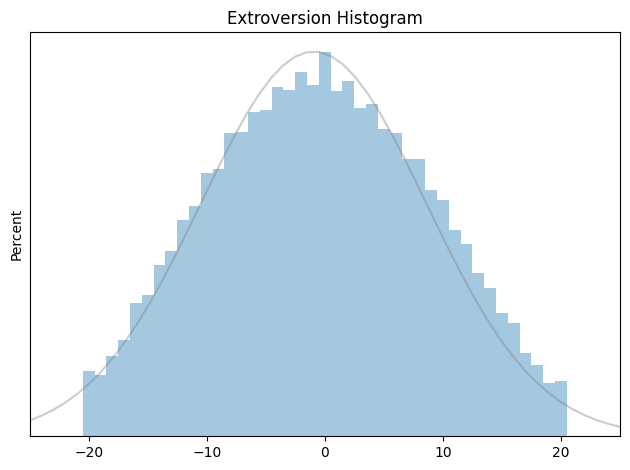

In [72]:
plot_pmf(big_five["EXT"], **bar_options)

decorate(title="Extroversion Histogram", **pmf_options)

In [73]:
def plot_cdf(series, **options):
    """Plot a CDF and a Gaussian CDF with the same mean and std.
    
    series: Series
    options: passed to plt.plot 
    """
    cdf_series = make_cdf(series)
    mu, sigma = fit_gaussian(series)
    qs = np.linspace(-25, 25)
    ps = norm.cdf(qs, mu, sigma) * 100
    plt.plot(qs, ps, color="gray", alpha=0.4)
    cdf_series.plot(**options)

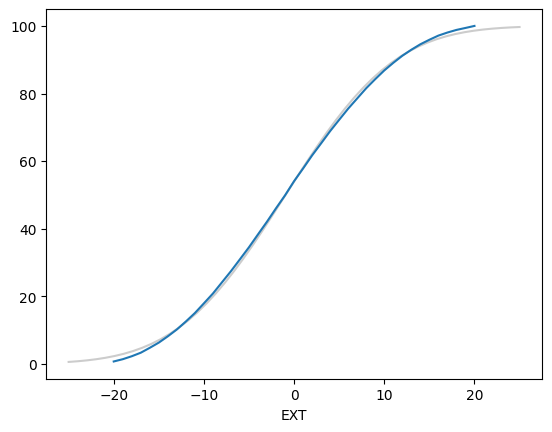

In [74]:
plot_cdf(big_five["EXT"])

The survey consists of 50 questions, with 10 questions intended to measure each of the five personality traits.
People respond on a five-point scale from "Strongly Disagree" to "Strongly Agree".
I scored the responses like this:

* "Strongly agree" scores 2 points.

* "Agree" scores 1 point,

* "Neutral" scores 0 points,

* "Disagree" scores -1 point, and 

* "Strongly disagree" scores -2 points.

For some questions, the scale is reversed; for example, if someone strongly agrees that they are "quiet around strangers," that counts as -2 points on the extroversion score.

Since there are 10 questions for each trait, the maximum score is 20 and the minimum score is -20.
For each of the five traits, the following figure shows the distributions of total scores for more than 800,000 respondents.

In [75]:
traits = {
    "EXT": "Extroversion",
    "EST": "Emotional stability",
    "CSN": "Conscientiousness",
    "AGR": "Agreeableness",
    "OPN": "Openness",
}

In [76]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

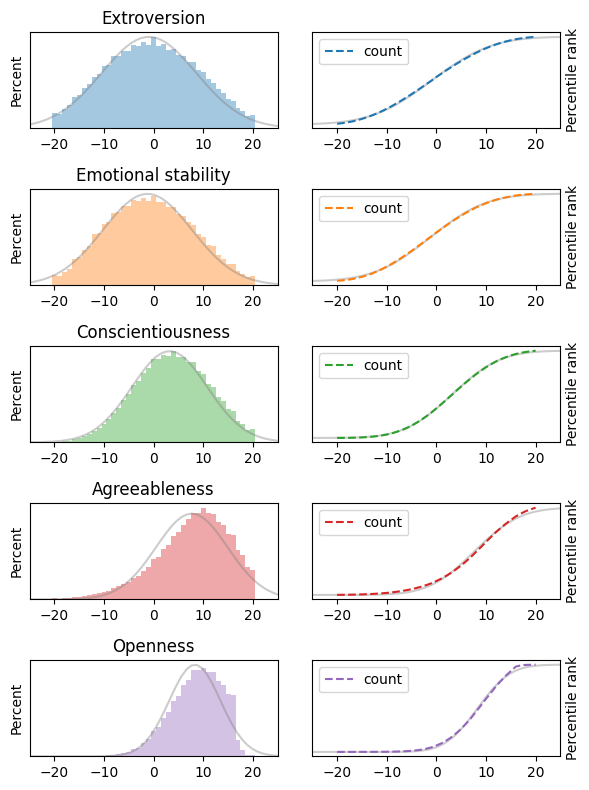

In [77]:
plt.figure(figsize=(6, 8))
shape = (5, 2)
colspan = 1

for i, trait in enumerate(traits):
    series = big_five[trait]
    plt.subplot2grid(shape, (i, 0), colspan=colspan)
    plot_pmf(series, color=colors[i], **bar_options)
    title = f"{traits[trait]}"
    decorate(title=title, **pmf_options)

    plt.subplot2grid(shape, (i, 1), colspan=colspan)
    plot_cdf(series, ls="--", color=colors[i])
    title = f"{traits[trait]} CDF"
    decorate(**cdf_options)
    plt.gca().yaxis.set_label_position("right")

The figures on the left show histograms; the figures on the right show CDFs.
In both figures, the shaded line is a Gaussian distribution I chose to fit the data.
The Gaussian model fits the first three distributions well (extroversion, emotional stability, and conscientiousness) except in the extreme tails. 

Let's see what happens if we apply Daniels's analysis to the Big Five data.
The following table shows the mean and standard deviation of the five scores, the range of values we'll consider "approximately average", and the percentage of the sample that falls in that range.

In [78]:
res = []

for trait in traits:
    series = big_five[trait]
    mu, sigma = series.mean(), series.std()
    num_std = 0.3
    low, high = np.array([-num_std, num_std]) * sigma + mu
    # low, high = np.percentile(series, [37, 63])
    nearly_average = series.between(low, high)
    percent = nearly_average.mean() * 100
    res.append((trait, mu, sigma, low, high, percent))

In [79]:
columns = ["Trait", "Mean", "Std Dev", "Low", "High", "% in range"]
index = list(traits.values())
table = pd.DataFrame(res, columns=columns, index=index)
table.index.name = "Trait"

compress_table(table.drop(columns=["Trait"]).round(1))

Trait,Mean,Std Dev,Low,High,% in range
Extroversion,-0.4,9.1,-3.1,2.3,23.4
Emotional stability,-0.7,8.6,-3.2,1.9,20.9
Conscientiousness,3.7,7.4,1.4,5.9,20.2
Agreeableness,7.7,7.3,5.5,9.9,21.1
Openness,8.5,5.2,7.0,10.1,28.3


In [80]:
average_table = pd.DataFrame(index=big_five.index, dtype=bool)

for trait_name, row in table.iterrows():
    trait, _, _, low, high, _ = row
    print(low, high)
    average_table[trait] = big_five[trait].between(low, high)

average_table.mean()

-3.1372871601929004 2.3252877053311494
-3.242306090116485 1.9093743572296462
1.448295151003666 5.872767227242111
5.547085266391241 9.923379349440902
6.998641959567459 10.09724854552145


EXT    0.233719
EST    0.209079
CSN    0.201916
AGR    0.210914
OPN    0.283486
dtype: float64

In [81]:
average_table.head()

,EXT,EST,CSN,AGR,OPN
0,False,False,True,True,False
1,False,False,False,False,True
2,False,False,True,False,False
3,False,True,False,True,True
4,True,False,False,False,False


In [82]:
array = np.cumprod(average_table.values, axis=1)

cumulative_table = pd.DataFrame(
    array, index=average_table.index, columns=average_table.columns, dtype=bool
)

cumulative_table.head()

,EXT,EST,CSN,AGR,OPN
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,True,False,False,False,False


For each trait, the "average" range contains 20-28% of the population. 
Now if we treat each trait as a hurdle and select people who are close to average on each one, the following table shows the results.

In [83]:
len(big_five)

873173

In [84]:
counts = cumulative_table.sum()
index = counts.index.to_series().replace(traits)
index.name = 'Trait'

results = pd.DataFrame({"Counts": counts.values}, index=index)
results["Percentages"] = counts.values / len(big_five) * 100

compress_table(results.round(1))

Trait,Counts,Percentages
Extroversion,204077,23.4
Emotional stability,46988,5.4
Conscientiousness,10976,1.3
Agreeableness,2981,0.3
Openness,926,0.1


The first column shows the number of people who make it past each hurdle; the second column shows the percentages.

Of the 873,173 people we started with, about 204,000 are close to the average in extroversion.
Of those, about 47,000 are close to the average in emotional stability.
And so on, until we find 926 who are close to average on all five traits, which is barely one person in a thousand.

## We Are All Equally Weird

Using the Big Five data again, I counted the number of traits where each respondent falls outside the range we defined as "approximately average".
We can think of the result as a kind of "weirdness score", where 5 means they are far from average on all five traits, and 0 means they are far from average on none.

The following figure shows the distribution of these scores for the roughly 800,000 people who completed the Big Five survey.

In [85]:
def summarize(varname, series):
    """Summarize the values in a series.
    
    varname: string
    series: Series
    
    low and high are the bounds of the "average" range
    n is the number of people who fall in that range
    
    return: tuple of (varname, mean, std, low, high, n)"""
    mu, sigma = series.mean(), series.std()
    num_std = 0.3
    low, high = np.array([-num_std, num_std]) * sigma + mu
    nearly_average = series.between(low, high)
    n = nearly_average.sum()
    return varname, mu, sigma, low, high, n

In [86]:
def make_summary_table(df, measurements, columns):
    """Make a table summarizing a set of measurements.
    
    df: DataFrame
    measurements: list of column names
    
    returns: DataFrame with the columns from summarize
    """
    res = []

    for varname in measurements:
        series = df[varname]
        t = summarize(varname, series)
        res.append(t)

    return pd.DataFrame(res, columns=columns)

In [87]:
def make_standardized_table(df, summary_table):
    """Compute standardized measurements.
    
    Express measurements in terms of standard deviations from the mean.
    
    df: DataFrame to get the original values from
    summary_table: DataFrame to get the rows from
    
    returns: DataFrame
    """
    d = {}
    for measurement, row in summary_table.iterrows():
        varname, mean, std, low, high, _ = row
        d[varname] = np.abs(df[varname] - mean) / std
    return pd.DataFrame(d)

In [88]:
def make_weird_table(df, summary_table):
    """Make a table counting number of weirdness points.
    
    df: DataFrame to get the data from
    summary_table: DataFrame to get the rows from
    
    returns: DataFrame
    """
    d = {}
    for measurement, row in summary_table.iterrows():
        varname, mean, std, low, high, _ = row
        is_average = df[varname].between(low, high)
        d[varname] = np.where(is_average, 0, 1)
    return pd.DataFrame(d)

In [89]:
columns = ["Trait", "Mean", "Std Dev", "Low", "High", "# in range"]
summary_table = make_summary_table(big_five, traits, columns)
summary_table

,Trait,Mean,Std Dev,Low,High,# in range
0,EXT,-0.406000,9.104291,-3.137287,2.325288,204077
1,EST,-0.666466,8.586134,-3.242306,1.909374,182562
2,CSN,3.660531,7.374120,1.448295,5.872767,176308
3,AGR,7.735232,7.293823,5.547085,9.923379,184164
4,OPN,8.547945,5.164344,6.998642,10.097249,247532


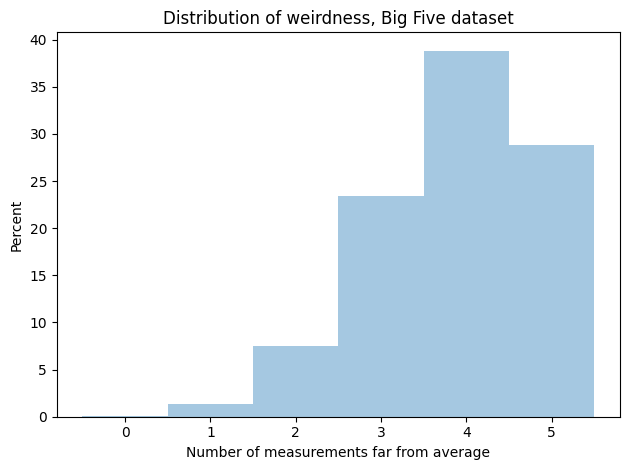

In [90]:
std_table = make_weird_table(big_five, summary_table)
weirdness = std_table.sum(axis=1)

pmf = Pmf.from_seq(weirdness)
pmf *= 100
pmf.bar(**bar_options)

decorate(
    xlabel="Number of measurements far from average",
    ylabel="Percent",
    title="Distribution of weirdness, Big Five dataset",
)

In [91]:
pmf[4:6].sum()

67.6952906239657

As we've already seen, very few people are close to average on all five traits.
Almost everyone is weird in two or more ways, and the majority (68\%) are weird in four or five ways! 

In [92]:
summary_table = make_summary_table(ansur_male, measurements, columns)
summary_table

,Trait,Mean,Std Dev,Low,High,# in range
0,abdominalextensiondepthsitting,254.650906,37.327178,243.452753,265.849060,886
1,acromialheight,1440.736894,63.287242,1421.750721,1459.723066,974
2,acromionradialelength,335.244488,17.482795,329.999649,340.489327,1054
3,anklecircumference,229.343949,14.649102,224.949218,233.738680,1039
4,axillaheight,1329.082068,59.516123,1311.227231,1346.936905,964
...,...,...,...,...,...,...
88,waistfrontlengthsitting,387.642822,29.349007,378.838120,396.447524,964
89,waistheightomphalion,1056.485301,52.154671,1040.838900,1072.131703,961
90,weightkg,855.239588,142.206992,812.577491,897.901686,983
91,wristcircumference,175.916707,8.955055,173.230191,178.603224,941


In [93]:
weird_table = make_weird_table(ansur_male, summary_table)
weird_table.mean()

abdominalextensiondepthsitting    0.782950
acromialheight                    0.761391
acromionradialelength             0.741793
anklecircumference                0.745468
axillaheight                      0.763841
                                    ...   
waistfrontlengthsitting           0.763841
waistheightomphalion              0.764576
weightkg                          0.759187
wristcircumference                0.769476
wristheight                       0.758697
Length: 93, dtype: float64

In [94]:
weird_table.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight
0,1,1,0,1,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,1,0,1,0,0,1,1,1,1,1,...,0,0,0,0,1,1,0,1,1,1
3,1,1,1,0,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,0,1
4,0,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,1,1


The distribution of weirdness is similar with physical traits.
Using the 93 measurements in the ANSUR dataset, we can count the number of ways each participant deviates from average.
The following figure shows the distribution of these counts for the male ANSUR participants.


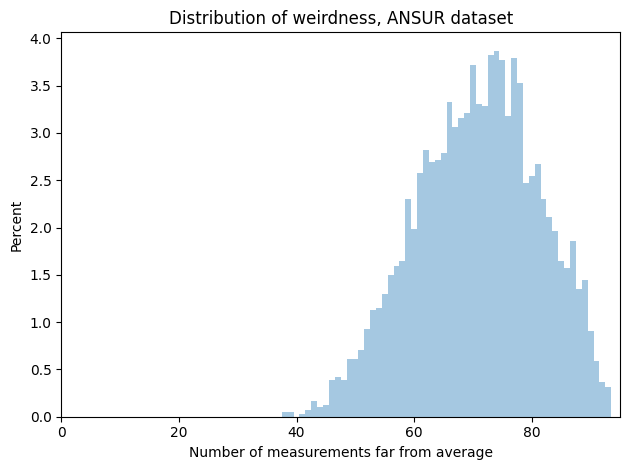

In [95]:
weirdness = weird_table.sum(axis=1)
pmf = Pmf.from_seq(weirdness)
pmf *= 100
pmf.bar(**bar_options)

decorate(
    xlabel="Number of measurements far from average",
    xlim=[0, 95],
    ylabel="Percent",
    title="Distribution of weirdness, ANSUR dataset",
)

Nearly everyone in this dataset is "weird" in at least 40 ways, and 90\% of them are weird in at least 57 ways.
With enough measurements, being weird is normal.

Now I'll use the ANSUR measurements to compute all possible ratios of two measurements.
With 93 measurements and 4278 ratios, there are a total of 4317 ways to be weird.
The following figure shows the distribution of weirdness scores for the male participants.

In [96]:
weirdness.mean()

70.78637922586967

In [97]:
np.percentile(weirdness, [10])

array([57.])

In [98]:
d = {}
for i, varname1 in enumerate(measurements):
    for j, varname2 in enumerate(measurements):
        if i <= j:
            continue
        colname = varname1 + varname2
        d[colname] = ansur_male[varname1] / ansur_male[varname2]

ratio_frame = pd.DataFrame(d)
ratio_frame.head()

,acromialheightabdominalextensiondepthsitting,acromionradialelengthabdominalextensiondepthsitting,acromionradialelengthacromialheight,anklecircumferenceabdominalextensiondepthsitting,anklecircumferenceacromialheight,anklecircumferenceacromionradialelength,axillaheightabdominalextensiondepthsitting,axillaheightacromialheight,axillaheightacromionradialelength,axillaheightanklecircumference,...,wristheighttrochanterionheight,wristheightverticaltrunkcircumferenceusa,wristheightwaistbacklength,wristheightwaistbreadth,wristheightwaistcircumference,wristheightwaistdepth,wristheightwaistfrontlengthsitting,wristheightwaistheightomphalion,wristheightweightkg,wristheightwristcircumference
0,5.515038,1.266917,0.229721,0.834586,0.151329,0.658754,5.063910,0.918200,3.997033,6.067568,...,0.928183,0.501765,1.702595,2.592705,0.914255,3.554167,1.938636,0.809298,1.046626,4.874286
1,5.987124,1.399142,0.233692,0.944206,0.157706,0.674847,5.549356,0.926882,3.966258,5.877273,...,0.887800,0.500922,1.886574,2.579114,0.936782,3.622222,2.196765,0.773245,1.122590,4.880240
2,4.982578,1.188153,0.238462,0.801394,0.160839,0.674487,4.623693,0.927972,3.891496,5.769565,...,0.905229,0.495232,1.760593,2.525836,0.862033,3.258824,2.021898,0.798271,0.894510,4.616667
3,5.756410,1.324786,0.230141,0.982906,0.170750,0.741935,5.294872,0.919822,3.996774,5.386957,...,0.936246,0.488000,1.720174,2.517460,0.925321,3.868293,1.987469,0.819215,0.998741,4.505682
4,6.340000,1.488000,0.234700,0.988000,0.155836,0.663978,5.912000,0.932492,3.973118,5.983806,...,0.875229,0.568195,2.042827,3.148515,1.099078,4.457944,2.517150,0.766265,1.008457,5.074468


In [99]:
ratio_frame.shape

(4082, 4278)

In [100]:
ratio_frame = pd.concat([ansur_male[measurements], ratio_frame], axis=1)
ratio_frame.shape

(4082, 4371)

In [101]:
summary_table2 = make_summary_table(ratio_frame, ratio_frame.columns, columns)
summary_table2.head()

,Trait,Mean,Std Dev,Low,High,# in range
0,abdominalextensiondepthsitting,254.650906,37.327178,243.452753,265.849060,886
1,acromialheight,1440.736894,63.287242,1421.750721,1459.723066,974
2,acromionradialelength,335.244488,17.482795,329.999649,340.489327,1054
3,anklecircumference,229.343949,14.649102,224.949218,233.738680,1039
4,axillaheight,1329.082068,59.516123,1311.227231,1346.936905,964


In [102]:
weird_table2 = make_weird_table(ratio_frame, summary_table2)
weird_table2.mean()

abdominalextensiondepthsitting        0.782950
acromialheight                        0.761391
acromionradialelength                 0.741793
anklecircumference                    0.745468
axillaheight                          0.763841
                                        ...   
wristheightwaistdepth                 0.773885
wristheightwaistfrontlengthsitting    0.762616
wristheightwaistheightomphalion       0.759187
wristheightweightkg                   0.760412
wristheightwristcircumference         0.760412
Length: 4371, dtype: float64

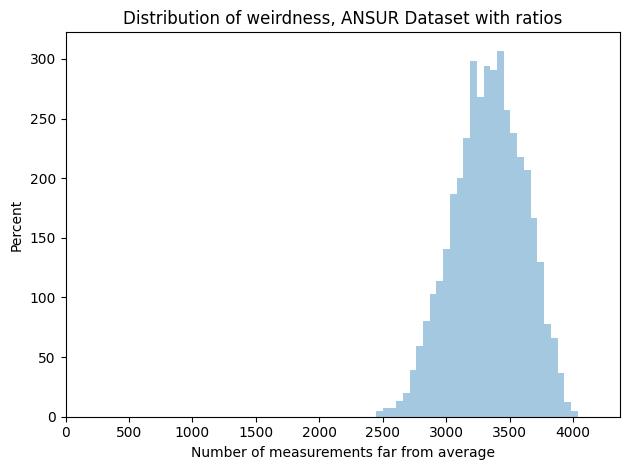

In [103]:
weirdness2 = weird_table2.sum(axis=1)
plt.hist(weirdness2, bins=30, fill=True, alpha=0.4)

decorate(
    xlabel="Number of measurements far from average",
    xlim=[0, 4371],
    ylabel="Percent",
    title="Distribution of weirdness, ANSUR Dataset with ratios",
)

With these measurements, all participants fall in a relatively narrow range of weirdness.
The most "normal" participant deviates from average in 2446 ways; the weirdest in 4038 ways.


In [104]:
weirdness2.quantile([0, 0.05, 0.5, 0.95, 1])

0.00    2446.00
0.05    2853.05
0.50    3343.00
0.95    3768.95
1.00    4038.00
dtype: float64

Probably Overthinking It

Copyright 2022 Allen Downey 

The code in this notebook and `utils.py` is under the [MIT license](https://mit-license.org/).